In [2]:
#install twitter tweet getter package
!pip install tweepy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
#Install for visualisation
!pip install wordcloud

     |████████████████████████████████| 368kB 2.6MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
#install preprocessor package
!pip install tweet-preprocessor

  Created wheel for tweet-preprocessor: filename=tweet_preprocessor-0.5.0-cp36-none-any.whl size=9705 sha256=58d51fa7db335db8411722bdfaca39b71ebd1b4edb8b4b4fafcbea7e4daca88b
  Stored in directory: /home/nbuser/.cache/pip/wheels/1b/27/cc/49938e98a2470802ebdefae9d2b3f524768e970c1ebbe2dc4a
Successfully built tweet-preprocessor
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
#import necessary libraries and packages

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from textblob import TextBlob
import preprocessor as p
import re
import csv

warnings.filterwarnings('ignore')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [ ]:
demoji.download_codes()

In [7]:
pd.set_option("display.max_colwidth", -1) # for seeing complete tweets in dataframe

In [8]:
# Twitter Developer Key and Tokens
consumer_key = 'uNDnh4zKFB1HNF4spxcmFaUsD'
consumer_secret = '7g5eTaiyOoJBkqnuLQ0W1XenL32J0GZNs9v029i7ETrANPPH4K'
access_token = '1662719154-oP61qUkteQzPv3VFcWJ7Ba3DZ4u5cCJb0XfBQkV'
access_token_secret = 'td08lqxzz7uiNQKSihtyunEjXAq3ygyXSd7KGyUyUwM0F'

### Gather Data from Twitter using Stream

In [71]:
class StdOutListener(StreamListener):
    
    def on_data(self, data):
        print(data)
        with open('fetched_tweets.txt','a') as tf:
            tf.write(data)
        return True
    def on_error(self, status):
        print(status)
        tf.close()

if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)
    
    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    stream.filter(track=phrase_list,languages=['en'])
    

{"created_at":"Wed Feb 26 09:06:19 +0000 2020","id":1232592719861731328,"id_str":"1232592719861731328","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":329284626,"id_str":"329284626","name":"@DesertRose","screen_name":"MsDesertRose","location":"UK for now-ish","url":null,"description":"A soul perhaps not for this world. Tryna make it 2 the end of the road while retaining some form of sanity. Mother of boys, M.O.B. Raising men. Pan-African \ud83c\uddf2\ud83c\udde6","translator_type":"none","protected":false,"verified":false,"followers_count":609,"friends_count":622,"listed_count":2

{"created_at":"Wed Feb 26 09:06:19 +0000 2020","id":1232592720897536005,"id_str":"1232592720897536005","text":"RT @dongpyopyopyong: Idek up to what extent you want us to prove how much we love X1. We're ready to do anything, just give us the 5 years.\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1100975683755364352,"id_str":"1100975683755364352","name":"aira \u2744\ufe0f","screen_name":"eunsangpriki_","location":"\ud83c\uddf5\ud83c\udded","url":null,"description":"X1 reboot | @x1members","translator_type":"none","protected":false,"verified":false,"followers_count":497,"friends_count":356,"listed_count":7,"favourites_count":3923,"statuses_count":5782,"created_at":"Thu Feb 28 04:27:12 +0000 2019","utc_offset":null,"time_zone":

{"created_at":"Wed Feb 26 09:06:20 +0000 2020","id":1232592724030824449,"id_str":"1232592724030824449","text":"RT @Adesewa_m: Who did I offend on this street? I\u2019m sure if I did a video that I wanna commit suicide and post it, Trust me, no one will vi\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3389123699,"id_str":"3389123699","name":"May","screen_name":"Mayyriam","location":"Nigeria","url":null,"description":"Life is good\u2764\ufe0f\u2764\ufe0f","translator_type":"none","protected":false,"verified":false,"followers_count":13,"friends_count":10,"listed_count":0,"favourites_count":20,"statuses_count":55,"created_at":"Thu Jul 23 12:37:18 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"con

{"created_at":"Wed Feb 26 09:06:21 +0000 2020","id":1232592727050579968,"id_str":"1232592727050579968","text":"RT @Flashyasf: I hate introducing myself \ud83d\ude2d\ud83d\ude2d\ud83d\ude2d\ud83d\ude29 ion be knowing shit about me","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1014080984000561152,"id_str":"1014080984000561152","name":"gg.bvelyn","screen_name":"ggbvelyn","location":"taurus","url":null,"description":"\ud835\udcbf\ud835\udcca\ud835\udcb6\ud835\udcc6\ud835\udcca\ud835\udcbe\ud835\udcc3 \ud83d\udcff\u2665\ufe0f","translator_type":"none","protected":false,"verified":false,"followers_count":118,"friends_count":96,"listed_count":0,"favourites_count":3094,"statuses_count":888,"created_at":"Tue Jul 03 09:38:42 +0000 2018","ut

{"created_at":"Wed Feb 26 09:06:21 +0000 2020","id":1232592729768677376,"id_str":"1232592729768677376","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":185217197,"id_str":"185217197","name":"Psyzah Thobakgale \ud83c\uddff\ud83c\udde6","screen_name":"Psyzah","location":"Azania \ud83c\uddff\ud83c\udde6","url":null,"description":"Economic Warrior. Man United fan. UP and UNISA Alumnus. Social Scientist. Creature of Habit. Sapiosexual. Vulcan of Azania. \ud83c\uddff\ud83c\udde6","translator_type":"none","protected":false,"verified":false,"followers_count":11828,"friends_count":11774,"l

{"created_at":"Wed Feb 26 09:06:22 +0000 2020","id":1232592731840503808,"id_str":"1232592731840503808","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":802722599570546689,"id_str":"802722599570546689","name":"Amalyna Hilmey","screen_name":"_amalyna_","location":"Damansara, Selangor","url":null,"description":"\ud83d\udc99\ud83d\udc9c\ud83d\udda4","translator_type":"none","protected":false,"verified":false,"followers_count":59,"friends_count":54,"listed_count":0,"favourites_count":568,"statuses_count":4870,"created_at":"Sun Nov 27 03:55:56 +0000 2016","utc_offset":null,"time_zone":n

{"created_at":"Wed Feb 26 09:06:23 +0000 2020","id":1232592734394798080,"id_str":"1232592734394798080","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":52918399,"id_str":"52918399","name":"Aliah: Yang Tinggi","screen_name":"tallismanem","location":null,"url":"https:\/\/my.w.tt\/LDxPwRfAuV","description":"Sabajap, on the way nak kuruslah ni!\nIG: http:\/\/instagram.com\/tallismanem\/","translator_type":"none","protected":false,"verified":false,"followers_count":168,"friends_count":287,"listed_count":4,"favourites_count":2514,"statuses_count":851,"created_at":"Thu Jul 02 01:08:40 +0

{"created_at":"Wed Feb 26 09:06:23 +0000 2020","id":1232592736986886145,"id_str":"1232592736986886145","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1215299632764338176,"id_str":"1215299632764338176","name":"Pena Hakiki","screen_name":"haqDiaDIA1","location":" Paka, Terengganu","url":null,"description":"kosong","translator_type":"none","protected":false,"verified":false,"followers_count":2,"friends_count":57,"listed_count":0,"favourites_count":410,"statuses_count":535,"created_at":"Thu Jan 09 15:49:58 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":nul

{"created_at":"Wed Feb 26 09:06:23 +0000 2020","id":1232592738023018496,"id_str":"1232592738023018496","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":922759278863233025,"id_str":"922759278863233025","name":"JoE\ud83e\udd41\ud83e\udd41","screen_name":"joshua_abubakar","location":"Gombe, Gombe State","url":null,"description":"#God\n#drumshipper\n#drumoracle\nBld. Engr","translator_type":"none","protected":false,"verified":false,"followers_count":835,"friends_count":949,"listed_count":0,"favourites_count":122,"statuses_count":56,"created_at":"Tue Oct 24 09:38:50 +0000 2017","utc_offset":null,"tim

{"created_at":"Wed Feb 26 09:06:24 +0000 2020","id":1232592742242451457,"id_str":"1232592742242451457","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1127188099153502208,"id_str":"1127188099153502208","name":"Atilolaalmustapha7","screen_name":"Atilolaalmusta2","location":"Bariga, Lagos","url":null,"description":"honest and just, but hate disappointing","translator_type":"none","protected":false,"verified":false,"followers_count":36,"friends_count":168,"listed_count":0,"favourites_count":1797,"statuses_count":1751,"created_at":"Sat May 11 12:25:59 +0000 2019","utc_offset":null,"t

{"created_at":"Wed Feb 26 09:06:25 +0000 2020","id":1232592744343855104,"id_str":"1232592744343855104","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":817171433331822594,"id_str":"817171433331822594","name":"i am Vancute","screen_name":"CuteYorubaGee","location":"Verona, Veneto","url":null,"description":"Just for fun\ud83c\uddf3\ud83c\uddec\ud83c\uddee\ud83c\uddf9\nGood Yoruba Gee!","translator_type":"none","protected":false,"verified":false,"followers_count":856,"friends_count":1005,"listed_count":1,"favourites_count":38031,"statuses_count":5832,"created_at":"Fri Jan 06 00:50:26

{"created_at":"Wed Feb 26 09:06:26 +0000 2020","id":1232592749205041153,"id_str":"1232592749205041153","text":"RT @rodcampsbay: Afriforum didn\u2019t exist in the apartheid days. Afriforum is lobbying to stop EWC which is a contravention of Article 17 of\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":631965524,"id_str":"631965524","name":"Marius Botha","screen_name":"mariusattorney","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":40,"friends_count":101,"listed_count":0,"favourites_count":7460,"statuses_count":930,"created_at":"Tue Jul 10 13:07:39 +0000 2012","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_transla

{"created_at":"Wed Feb 26 09:06:26 +0000 2020","id":1232592749674758147,"id_str":"1232592749674758147","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":882478954174713862,"id_str":"882478954174713862","name":"Rose Noire \ud83c\udf39","screen_name":"vie_la_roseee","location":"Anywhere, Everywhere, Earth","url":null,"description":"Grateful Soul. Blessed. Alhamdulillah Always.","translator_type":"none","protected":false,"verified":false,"followers_count":170,"friends_count":517,"listed_count":0,"favourites_count":2230,"statuses_count":1199,"created_at":"Wed Jul 05 05:59:13 +0000 2017",

{"created_at":"Wed Feb 26 09:06:27 +0000 2020","id":1232592752652668930,"id_str":"1232592752652668930","text":"It\u2019s like if I kill myself then would people acknowledge I exist","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2493427904,"id_str":"2493427904","name":"Quentin Thomas","screen_name":"QuentinJokes","location":"Los Angeles, CA","url":null,"description":"I do stand up. I do sketches. Future Survivor Winner.","translator_type":"none","protected":false,"verified":false,"followers_count":183,"friends_count":129,"listed_count":5,"favourites_count":11936,"statuses_count":5907,"created_at":"Tue May 13 19:28:26 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":null,"contributors_enabled":false,"is_transl

{"created_at":"Wed Feb 26 09:06:28 +0000 2020","id":1232592756884852736,"id_str":"1232592756884852736","text":"My insomnia is back..I've been awake for almost 3 hours.\nIf you want to really know what it feels like to be the \"W\u2026 https:\/\/t.co\/9zPsMu3wH2","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":84811624,"id_str":"84811624","name":"Deni Belle","screen_name":"Msdsplayground","location":"Somewhere in Florida ","url":null,"description":"PGF\/Zen, Wife & Mom, Veteran, Pro Common Sense..#amandie fan\nI love Sci-fi, books, beach, poetry, most music and huge Metallica fan","translator_type":"none","protected":false,"verified":false,"followers_count":1821,"friends_count":4984,"listed_count":2,"favourites_count":16798,"statuses

{"created_at":"Wed Feb 26 09:06:29 +0000 2020","id":1232592760663871488,"id_str":"1232592760663871488","text":"RT @VirginMedia_One: \"No one when they are young goes like I want to end up in prison for the rest of my life\" \nNew Series: Domini Kemp con\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":953557692748091392,"id_str":"953557692748091392","name":"Street Leagues Lev","screen_name":"LevStreetLeague","location":"Dublin City, Ireland","url":null,"description":"Middle-aged potato eater. Director Irish Homeless Street Leagues. Committed dad dancer. Writer. Likes\/dislikes many things. Homes for all","translator_type":"none","protected":false,"verified":false,"followers_count":70,"friends_count":273,"listed_count":0,"favourites_count":1

{"created_at":"Wed Feb 26 09:06:29 +0000 2020","id":1232592762073239554,"id_str":"1232592762073239554","text":"RT @Rajput_Ramesh: Your ancestors chose India to loot, riot, burn public properties, vandalize, kill innocent people, block roads, kill men\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":864817195234115584,"id_str":"864817195234115584","name":"Vishesh Tanwar","screen_name":"visheshtanwar26","location":"Chandigarh, India","url":null,"description":"#Interested In #Politics #100PratisatHaryanvi","translator_type":"none","protected":false,"verified":false,"followers_count":892,"friends_count":3185,"listed_count":0,"favourites_count":282319,"statuses_count":138517,"created_at":"Wed May 17 12:17:41 +0000 2017","utc_offse

{"created_at":"Wed Feb 26 09:06:29 +0000 2020","id":1232592763130195968,"id_str":"1232592763130195968","text":"Pels held it down all the way to the end","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2568655204,"id_str":"2568655204","name":"RFM Loski \u2122\ufe0f","screen_name":"_Melphlauren","location":"Around ","url":"https:\/\/m.youtube.com\/watch?v=T-Um3ehjU-E","description":"Real Intelligent Consistent Hustlers \ud83d\udda4 #Richfam - 4th Quarter Out Now. \ud83d\udc05","translator_type":"none","protected":false,"verified":false,"followers_count":807,"friends_count":641,"listed_count":3,"favourites_count":15280,"statuses_count":24368,"created_at":"Wed May 28 09:09:46 +0000 2014","utc_offset":null,"time_zone":null,"geo_enabled":f

{"created_at":"Wed Feb 26 09:06:30 +0000 2020","id":1232592767265587200,"id_str":"1232592767265587200","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":904182673886691328,"id_str":"904182673886691328","name":"eman","screen_name":"aimannnzulkafli","location":"Bandar Melaka, Malacca","url":"http:\/\/Instagram.com\/emanzul_","description":"\u26bd\ufe0f + \ud83d\udcf8","translator_type":"none","protected":false,"verified":false,"followers_count":448,"friends_count":307,"listed_count":0,"favourites_count":31676,"statuses_count":37151,"created_at":"Sun Sep 03 03:22:03 +0000 2017","utc_off

{"created_at":"Wed Feb 26 09:06:30 +0000 2020","id":1232592767815168001,"id_str":"1232592767815168001","text":"@OllieDouglas @prm_laurita @DeLakenhal @KnolMeta @AshmoleanMuseum It's easy for the armchair pundit to just look at\u2026 https:\/\/t.co\/32x50jR8MR","display_text_range":[66,140],"source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1232588617291309057,"in_reply_to_status_id_str":"1232588617291309057","in_reply_to_user_id":28091912,"in_reply_to_user_id_str":"28091912","in_reply_to_screen_name":"OllieDouglas","user":{"id":2305188457,"id_str":"2305188457","name":"Mark Carnall","screen_name":"mark_carnall","location":null,"url":"https:\/\/fistfulofcinctans.wordpress.com\/","description":"Mark Carnall. Museum goer, writist, cephalopodologist, palaeontologist.","translator_type":"none","protected":false,"verified":false,"followers_count":4035,"friends_count":1707,"listed_count":130,"fa

{"created_at":"Wed Feb 26 09:06:31 +0000 2020","id":1232592771266965505,"id_str":"1232592771266965505","text":"RT @cherubic_update: I want a 50 gallon drum of retinol so I can slather my entire body in it every single night and just have perfect skin\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":19259558,"id_str":"19259558","name":"NIKKI LIPSTICK","screen_name":"nikkilipstick","location":"tits worldwide ","url":"http:\/\/nikkilipstick.com","description":"CUZ IM LIVING IN A DIGITAL WORLD, AND I AM JUST A DIGITAL GIRL ...CEHOE OF http:\/\/t.co\/cgIrM5Oi #DOLLCULT 3\r\nhttp:\/\/t.co\/Inqipovk\r\nhttp:\/\/t.co\/UyRws7Qk","translator_type":"none","protected":false,"verified":false,"followers_count":29914,"friends_count":6266,"lis

{"created_at":"Wed Feb 26 09:06:31 +0000 2020","id":1232592771967483905,"id_str":"1232592771967483905","text":"@mrkiplingcakes I checked the others when I got home and all but 2 had the icing on them!! It\u2019s all good - I got a \u201cproper\u201d one in the end.","display_text_range":[16,139],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1232592239748055040,"in_reply_to_status_id_str":"1232592239748055040","in_reply_to_user_id":121185207,"in_reply_to_user_id_str":"121185207","in_reply_to_screen_name":"mrkiplingcakes","user":{"id":121868785,"id_str":"121868785","name":"kathryn jennison","screen_name":"kafrin84","location":"chorley, lancashire","url":null,"description":"mum to Deccers, Loyal friend, Criminology graduate, Teacher, Tennis fan, Planner addict, Book geek and Apple enthusiast!","translator_type":"none","protected":false,"verified":false,"followers_count":7

{"created_at":"Wed Feb 26 09:06:32 +0000 2020","id":1232592774702288901,"id_str":"1232592774702288901","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":932888731668959232,"id_str":"932888731668959232","name":"\u270c\ud83c\udffdknee\ud83d\ude07","screen_name":"tventurra","location":"London, England","url":null,"description":"Good vibes \u2728","translator_type":"none","protected":false,"verified":false,"followers_count":1356,"friends_count":557,"listed_count":28,"favourites_count":35338,"statuses_count":90229,"created_at":"Tue Nov 21 08:29:40 +0000 2017","utc_offset":null,"time_zone"

{"created_at":"Wed Feb 26 09:06:33 +0000 2020","id":1232592776820404224,"id_str":"1232592776820404224","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1132799676133060609,"id_str":"1132799676133060609","name":"YT: MoSudani","screen_name":"Mosudanii","location":null,"url":"https:\/\/www.youtube.com\/channel\/UCBazEbtymBqiTjmlN5KIbRQ","description":"\ud83c\uddf8\ud83c\udde9 changing the world one day watch.","translator_type":"none","protected":false,"verified":false,"followers_count":253,"friends_count":175,"listed_count":0,"favourites_count":2660,"statuses_count":1160,"created_at":

{"created_at":"Wed Feb 26 09:06:33 +0000 2020","id":1232592779093606403,"id_str":"1232592779093606403","text":"RT @IndianExpress: Nothing has happened to the country. The country is rising high. World has seen how lakhs of people came for Trump event\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1198992036768010240,"id_str":"1198992036768010240","name":"Heeba siddiqui .","screen_name":"SiddiquiHeeba","location":"New Delhi","url":null,"description":"Creative and hardworking. B.A (H) POL.SCI, M.A(GENDER STUDIES) jamia millia islamia.Studying B.ED in Amity university.  May Allah bless to all the Muslims .\ud83d\udd4b","translator_type":"none","protected":false,"verified":false,"followers_count":72,"friends_count":46,"listed_count":0,"favour

{"created_at":"Wed Feb 26 09:06:34 +0000 2020","id":1232592782570639360,"id_str":"1232592782570639360","text":"ALL OUT WAR DAY 1\ud83e\udd8b\n\nI'm an Oneit and I am strong. \nI commit to fully participate in all events in the next two week\u2026 https:\/\/t.co\/9SQuMjGNEh","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1079384523878555648,"id_str":"1079384523878555648","name":"piya\ud83e\udd8b #BraveforX1","screen_name":"kyeoptadongpyo","location":"X1's","url":null,"description":"THIS ACCOUNT IS FOR X1 , VICTON , SEVENTEEN , GOT7 , BTS, TREASURE AND MANY MORE.","translator_type":"none","protected":false,"verified":false,"followers_count":261,"friends_count":461,"listed_count":0,"favourites_count":10262,"statuses_count":6223,"creat

{"created_at":"Wed Feb 26 09:06:35 +0000 2020","id":1232592785536143360,"id_str":"1232592785536143360","text":"RT @runchranda_mp3: For context, CCN is a right wing, conservative online publication that initially started about cryptocurrencies. The si\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1018579195247710208,"id_str":"1018579195247710208","name":"\u2077","screen_name":"starryseoks","location":"\ud83c\uddeb\ud83c\uddf7\ud83c\uddfa\ud83c\uddf8 || they\/them","url":null,"description":"yoongi is the gay we all strive to be\n    - twitter user @jjkstrwbrry\n|| please check out my fanart account @kearow_art!! ||","translator_type":"none","protected":false,"verified":false,"followers_count":624,"friends_count":1489,"listed

{"created_at":"Wed Feb 26 09:06:35 +0000 2020","id":1232592787247333376,"id_str":"1232592787247333376","text":"RT @__azee___: The problem is that y\u2019all take a joke and stretch it out so much that it\u2019s not funny anymore.","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1218787420214382592,"id_str":"1218787420214382592","name":"SMS BSM 1 to 16565","screen_name":"banyezus","location":null,"url":null,"description":"Radio Presenter #DumaFmBdub5 \u2022V.O.A \u2022Event MC \u2022Hip Hop Enthusiast \u2022Battle Rap Addict","translator_type":"none","protected":false,"verified":false,"followers_count":317,"friends_count":291,"listed_count":0,"favourites_count":76,"statuses_count":4013,"created_at":"Sun Jan 19 06:49:29 +0000 2020","ut

{"created_at":"Wed Feb 26 09:06:35 +0000 2020","id":1232592787729678337,"id_str":"1232592787729678337","text":"RT @UmaarKazmi: Yes, there are political prisoners on the island of Cuba!\n\nAnd it's true that people have been brutally tortured under inca\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":56254011,"id_str":"56254011","name":"Jane Shepherd","screen_name":"jennyrose5","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":89,"friends_count":357,"listed_count":1,"favourites_count":13105,"statuses_count":7596,"created_at":"Mon Jul 13 01:53:52 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"

{"created_at":"Wed Feb 26 09:06:35 +0000 2020","id":1232592788715212801,"id_str":"1232592788715212801","text":"RT @auldtimer: Speaking specifically of you, why is an Indian law that gives refuge in India to religious minorities persecuted in Pakistan\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1565518110,"id_str":"1565518110","name":"Scrap RTE","screen_name":"being_ak4","location":null,"url":null,"description":"Before -- Hope to see a developed and prosperous India at least before my lifetime.\nAfter -- 3 terms of Modiji , followed by 3 terms of Yogiji will do.","translator_type":"none","protected":false,"verified":false,"followers_count":276,"friends_count":316,"listed_count":18,"favourites_count":9630,"statuses_count":

{"created_at":"Wed Feb 26 09:06:36 +0000 2020","id":1232592792557424642,"id_str":"1232592792557424642","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2166312681,"id_str":"2166312681","name":"Najeeb Magaji","screen_name":"Najeebydm","location":null,"url":null,"description":"Self crush!!!!!\ud83d\udc96\ud83d\udc96\ud83d\udc96\n\nAdvocate of good governance and humanitarian value.\ud83d\udc4c\ud83d\udc4c\n\nChairman of Yandoma Youth Consultative Forum.","translator_type":"none","protected":false,"verified":false,"followers_count":167,"friends_count":219,"listed_count":0,"favourites

{"created_at":"Wed Feb 26 09:06:37 +0000 2020","id":1232592793966694400,"id_str":"1232592793966694400","text":"RT @ThatKevinSmith: 2 years ago from today, I almost died of a massive heart attack. 1 year ago today, we started shooting #JayAndSilentBob\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":274386705,"id_str":"274386705","name":"Renier Swanepoel","screen_name":"RenierJustWonIt","location":"Cape Town","url":"http:\/\/www.ineednowebsite.co.za","description":"Competitive & Proud DAD of a 12 year old as well as passionate supporter of the Springboks(WC) \/ WP(Jou Lekka Ding) \/ STORMERS \/ Manchester United \/ Cape Cobras","translator_type":"none","protected":false,"verified":false,"followers_count":779,"friends_count":479,"listed_count

{"created_at":"Wed Feb 26 09:06:38 +0000 2020","id":1232592798517485573,"id_str":"1232592798517485573","text":"RT @GovBlago: Just to be clear: I am NOT in any way suicidal. I am a freshly freed man with a new lease on life. If Blago goes bye bye, we\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":280194441,"id_str":"280194441","name":"Glenn A. Moore","screen_name":"gmoorechicago","location":"Geneva, Illinois","url":null,"description":"That which you manifest is before you.","translator_type":"none","protected":false,"verified":false,"followers_count":480,"friends_count":754,"listed_count":7,"favourites_count":21908,"statuses_count":23276,"created_at":"Sun Apr 10 20:55:58 +0000 2011","utc_offset":null,"time_zone":null,"geo_enab

{"created_at":"Wed Feb 26 09:06:39 +0000 2020","id":1232592804833939456,"id_str":"1232592804833939456","text":"@annathiikaa @AnarchoShanties I have one baudrillard book, two nick lands, two negarestani, one sadie plant, three\u2026 https:\/\/t.co\/WSVOqtWLcy","display_text_range":[30,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1232592426256216065,"in_reply_to_status_id_str":"1232592426256216065","in_reply_to_user_id":33640658,"in_reply_to_user_id_str":"33640658","in_reply_to_screen_name":"annathiikaa","user":{"id":920011048081485824,"id_str":"920011048081485824","name":"Phoebe Buffay stan account","screen_name":"hug_a_commie","location":"Yo Momma","url":null,"description":"R\u0330\u0325\u0334\u035f\u0338\u0337\u035d\u0337E\u0314\u034a\u032f\u035a\u033c\u034e\u031f\u0316\u031c\u0318\u031cD\u0302\u0351\u0366\u036c\u0365\u0367\u030d\u032f\u0332\u033a\u0324\u034d\u

{"created_at":"Wed Feb 26 09:06:40 +0000 2020","id":1232592809011449858,"id_str":"1232592809011449858","text":"@Starstruck_Wish I have known Doodle for all of about five seconds and yet if anything happened to him, I would kil\u2026 https:\/\/t.co\/QMCQ1FCOJm","display_text_range":[17,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":1232547228721405952,"in_reply_to_status_id_str":"1232547228721405952","in_reply_to_user_id":998334288939565057,"in_reply_to_user_id_str":"998334288939565057","in_reply_to_screen_name":"Starstruck_Wish","user":{"id":899027485928562688,"id_str":"899027485928562688","name":"\ud83d\udcabASTRAL\ud83d\udcab","screen_name":"AstralDragons","location":"United States","url":null,"description":"They\/them \/\/ Writer \/\/ (lovely icon by @PoshAuss; fantastic background by @murakaruki)","translator_type":"none","protected":false,"verified":false,"foll

{"created_at":"Wed Feb 26 09:06:41 +0000 2020","id":1232592814074032128,"id_str":"1232592814074032128","text":"RT @FandomsCollide: Here\u2019s a comparison for all the Onces that believe GOT7\u2019s mistreatment is fake. \n\nWe are not saying Twice don\u2019t deserve\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1110210036591017984,"id_str":"1110210036591017984","name":"WeeriaOnlyGOT7","screen_name":"Weeria4","location":null,"url":null,"description":"#MarkBam\n#BamBam\n#\uac13\uc138\ube10\n#GOT7 @GOT7Official\n\u0e1b\u0e01\u0e15\u0e34\u0e08\u0e30\u0e0a\u0e2d\u0e1a GG \u0e21\u0e32\u0e01\u0e01\u0e27\u0e48\u0e32 \u0e17\u0e31\u0e49\u0e07\u0e46\u0e17\u0e35\u0e48\u0e1f\u0e31\u0e07 Kpop \u0e21\u0e32\u0e40\u0e01\u0e37\u0e2d\u0e1a\

{"created_at":"Wed Feb 26 09:06:42 +0000 2020","id":1232592817459007490,"id_str":"1232592817459007490","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1193196496260341761,"id_str":"1193196496260341761","name":"\u2740\u06dd\ud835\uddd9\ud835\uddd4\ud835\udde7\ud835\udddc\ud835\udde0\ud835\uddd4 \ud835\uddd8\ud835\udded\ud835\udded\ud835\uddd4\ud835\udddb\ud835\udde5\ud835\uddd4\ud835\uddd8\u06dd\u2732","screen_name":"FatimaE16731897","location":"Royaume du Maroc","url":null,"description":"I always learn from mistakes of others who take my advice......","translator_type":"none","pr

{"created_at":"Wed Feb 26 09:06:43 +0000 2020","id":1232592819707052032,"id_str":"1232592819707052032","text":"I just see #GlobalWarming \ud83d\ude2d4 kids!!!\n\nWhat\u2019s wrong with me?\ud83e\udd26\u200d\u2640\ufe0f","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1057892307029106688,"id_str":"1057892307029106688","name":"Jesus is With Chen","screen_name":"Rainbow_Floppp","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":779,"friends_count":1011,"listed_count":1,"favourites_count":231550,"statuses_count":256594,"created_at":"Thu Nov 01 07:09:15 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_tra

{"created_at":"Wed Feb 26 09:06:43 +0000 2020","id":1232592821321969664,"id_str":"1232592821321969664","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1030059880235851776,"id_str":"1030059880235851776","name":"\ud83d\ude0eMAJ Loyalist\ud83d\ude0e","screen_name":"KamalKa86075082","location":"Kaduna, Nigeria","url":null,"description":"Graphics Designer + Computer Analyst and Consultant \ud83d\udcaa\ud83c\udffd","translator_type":"none","protected":false,"verified":false,"followers_count":34,"friends_count":237,"listed_count":0,"favourites_count":77,"statuses_count":22,"created_at":

{"created_at":"Wed Feb 26 09:06:44 +0000 2020","id":1232592822802493440,"id_str":"1232592822802493440","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":125426721,"id_str":"125426721","name":"Buhari Yahaya buhari","screen_name":"buhariyb","location":"Abuja,Nigeria","url":null,"description":"Am cool and calm, I like having friends","translator_type":"none","protected":false,"verified":false,"followers_count":652,"friends_count":1215,"listed_count":0,"favourites_count":1760,"statuses_count":3700,"created_at":"Mon Mar 22 19:38:54 +0000 2010","utc_offset":null,"time_zone":null,"geo_ena

{"created_at":"Wed Feb 26 09:06:44 +0000 2020","id":1232592824748724224,"id_str":"1232592824748724224","text":"RT @kaymerraine: hard at work #robloxdev #rr34 dont look at the rr34 tag unless you want to die thanks https:\/\/t.co\/LVHnaRcu26","source":"\u003ca href=\"https:\/\/www.roblox.com\" rel=\"nofollow\"\u003eTwitter for MS Paint\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":891092828461203457,"id_str":"891092828461203457","name":"Roblox RT Bot\u2122","screen_name":"RobloxRTer","location":"Minecraft","url":"http:\/\/roblox.com","description":"Next-Gen Artificial Intelligence | Might one day take over the world... | Sharing #RobloxDev 24\/7 | Retweeting your content since 2017. | By @SuperPlayzYT","translator_type":"none","protected":false,"verified":false,"followers_count":1410,"friends_count":104,"listed_count":9,"favourites_count

{"created_at":"Wed Feb 26 09:06:45 +0000 2020","id":1232592828506632193,"id_str":"1232592828506632193","text":"@Discord_Child @NelsonLichtens1 That\u2019s fine. I\u2019m not criticizing you. They are both worthless academics who know nothing about us.","display_text_range":[32,130],"source":"\u003ca href=\"http:\/\/twitter.com\/#!\/download\/ipad\" rel=\"nofollow\"\u003eTwitter for iPad\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1232592416122662912,"in_reply_to_status_id_str":"1232592416122662912","in_reply_to_user_id":1005073970557739008,"in_reply_to_user_id_str":"1005073970557739008","in_reply_to_screen_name":"Discord_Child","user":{"id":1218268432874885120,"id_str":"1218268432874885120","name":"RepealAB5","screen_name":"Ab45Repeal","location":"California, USA","url":null,"description":"#RepealAB5, #AB5stories, #AB5works, #AB5, Facebook: Freelancers Against AB5; Bill to immediately repeal AB5! #AB1928 - John Vogel @Vogel4assembly","translator_type":"none","protected":f

{"created_at":"Wed Feb 26 09:06:46 +0000 2020","id":1232592831031672834,"id_str":"1232592831031672834","text":"RT @ajplus: \"I want to kill myself.\"\n\nA video of 9-year-old Quaden Bayles pleading for his death in Australia went viral, inspiring a globa\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":774797713,"id_str":"774797713","name":"Viviana Casta\u00f1o","screen_name":"vicastano8","location":"Barranquilla, Colombia","url":null,"description":"Ingeniera Comercial","translator_type":"none","protected":false,"verified":false,"followers_count":126,"friends_count":103,"listed_count":0,"favourites_count":130,"statuses_count":310,"created_at":"Thu Aug 23 00:25:54 +0000 2012","utc_offset":null,"time_zone":null,"geo_enabled":true

{"created_at":"Wed Feb 26 09:06:46 +0000 2020","id":1232592832222957568,"id_str":"1232592832222957568","text":"@MMasonXXX This is the last thing I want to see before I die","display_text_range":[11,60],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":1232587860588613637,"in_reply_to_status_id_str":"1232587860588613637","in_reply_to_user_id":314964776,"in_reply_to_user_id_str":"314964776","in_reply_to_screen_name":"MMasonXXX","user":{"id":1165138533151121408,"id_str":"1165138533151121408","name":"\ud835\uddc9\ud835\uddcb\ud835\uddc2\ud835\uddc6\ud835\uddbe\ud835\uddfa\ud835\uddf6\ud835\uddf4\ud835\uddf5\ud835\ude01.","screen_name":"xtoshinoriyagi","location":"icon \u00a9 u2suke \u2571 no minors.","url":null,"description":"\u2800\u2800\u0f7e\u0f35 \u0ac8\ud81a\udc04\u2800\ua80b \ud835\ude31\ud835\ude22\ud835\ude33\ud835\ude30\ud835\ude25\ud835\ude3a \ud835\ude22\ud835\ude

{"created_at":"Wed Feb 26 09:06:47 +0000 2020","id":1232592838304530438,"id_str":"1232592838304530438","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1150000945821995008,"id_str":"1150000945821995008","name":"Epan","screen_name":"Eirfan_H","location":null,"url":null,"description":"Not your typical hufflepuff\ud83e\udda1","translator_type":"none","protected":false,"verified":false,"followers_count":98,"friends_count":211,"listed_count":0,"favourites_count":3365,"statuses_count":4467,"created_at":"Sat Jul 13 11:16:06 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":fal

{"created_at":"Wed Feb 26 09:06:48 +0000 2020","id":1232592840838066177,"id_str":"1232592840838066177","text":"I want to cry and cry and then cry until I die..","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1173946142410891264,"id_str":"1173946142410891264","name":"Samerh","screen_name":"Samerh21_45","location":null,"url":null,"description":"..","translator_type":"none","protected":false,"verified":false,"followers_count":47,"friends_count":96,"listed_count":0,"favourites_count":83,"statuses_count":44,"created_at":"Tue Sep 17 13:05:58 +0000 2019","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_background_image_url":"

{"created_at":"Wed Feb 26 09:06:50 +0000 2020","id":1232592849167798272,"id_str":"1232592849167798272","text":"RT @muftimenk: We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past event\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1093866953800790019,"id_str":"1093866953800790019","name":"jojo","screen_name":"jojo57182682","location":null,"url":null,"description":"Do what you\u2665\ufe0f,and \u2665\ufe0f what you do","translator_type":"none","protected":false,"verified":false,"followers_count":9,"friends_count":103,"listed_count":0,"favourites_count":973,"statuses_count":1216,"created_at":"Fri Feb 08 13:39:39 +0000 2019","utc_offset":null,"time_zone":null,"geo

KeyboardInterrupt: 

In [ ]:
   phrase_list = ['Asleep and never wake','Just want to sleep forever','Take my own life',
                   'Can’t do this anymore','Kill myself','Thoughts of suicide',
                   'Could just fall asleep','Killing myself','Tired of being alone',
                   'Die in my sleep','Life is so meaningless','Tired of being lonely',
                   'Don’t want to be here','Life is too hard','To end this nightmare',
                   'Don’t want to exist','Life is worthless','To hurt myself',
                   'Don’t want to go on','My death would','To live anymore',
                   'Don’t want to live','My life consists of nothing','Want it to be over',
                   'Don’t want to try anymore','My life is pointless','Want to be alive anymore',
                   'Don’t want to wake up','My life is this miserable','Want to be around anymore',
                   'End it all','My life isn’t worth','Want to be dead',
                   'End my life','Not want to be alive','Want to be gone',
                   'End this pain','Nothing to live for','Want to be here anymore',
                   'Ending it all','Point in living','Want to die',
                   'Hate my life','Put an end to this','Want to disappear',
                   'Hate myself','Ready to die','Want to end it',
                   'I’m drowning','Really need to die','Wanted to die',
                   'I’m leaving now','Stop the pain','Wanting to kill yourself and',
                   'I’m worthless','Suicidal','What is wrong with me',
                   'Isn’t worth living','Suicide','Why should I continue living',
                   'Just want to give up','Take it anymore']

### Get JSON data from text file onto list

In [9]:
tweets_data_path = 'fetched_tweets.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")

#load the tweet json onto a list
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
# print("Total fetched tweets"+" "+str(len(tweets_data)))



Total fetched tweets 12155


In [10]:
# Example Json Format
tweets_data[1]

{'created_at': 'Wed Feb 26 09:43:23 +0000 2020',
 'id': 1232602049742876674,
 'id_str': '1232602049742876674',
 'text': 'RT @oil_shaeikh: Don’t be too hard on yourself, what you’re aiming at is what someone is tired of, that dream Benz , someone is using it to…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1172176032432082944,
  'id_str': '1172176032432082944',
  'name': '_BULLETPROOF__',
  'screen_name': 'Ibrahim_bardeey',
  'location': 'Kano, Nigeria',
  'url': None,
  'description': None,
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 874,
  'friends_count': 1068,
  'listed_count': 0,
  'favourites_count': 14743,
  'statuses_count': 11842,
  'created_at': 'Thu Sep 12 15:52:15 +0000 20

In [11]:
#Fetch data from a given json format tweet response along with twitter ID onto a dataframe

def get_dataFrame(tweets_data):
    text=[]
    temp_list = []
    username=[]
    user_id = []
    RT = 'retweeted_status'
    ET = 'extended_tweet'
    for tweet in tweets_data:
        if tweet['text'] not in temp_list:
            temp_list.append(tweet['text'])
            username.append(tweet['user']['screen_name'])
            user_id.append(tweet['user']['id'])
            if RT in tweet:
                if ET in tweet[RT]:
                    text.append(tweet[RT][ET]['full_text'])
                else:
                    text.append(tweet[RT]['text'])
            else:
                if ET in tweet:
                    text.append(tweet[ET]['full_text'])
                else:
                    text.append(tweet['text'])
        else:
            continue
    tweet_df = pd.DataFrame(list(zip(user_id,text)),columns=['id','tweet'])
    return tweet_df
    
    

In [12]:
# Display tweets dataframe
tweet_df = get_dataFrame(tweets_data)
tweet_df

,id,tweet
0,252878593,U hate what??
1,1172176032432082944,"Don’t be too hard on yourself, what you’re aiming at is what someone is tired of, that dream Benz , someone is using it to pack his horse feeds, that getzner you’re dying to buy, it’ll look irrelevant to you some days, that dream house is a process, take life easy, you’re trying."
2,3350124899,🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋\n\nI don't know about you guys but we're not\n\ngetting on a plane with these muzzie freaks\n\nhttps://t.co/ghcSgvmkQU
3,226387404,"WOW-@RashidaTlaib&amp; @IlhanMN HATE this video of an Islamic @realDonaldTrump supporter saying, “I love you. You are the greatest @POTUS. I am Muslim. I support this man to the death with my life...” so it’d be a shame if it kept getting retweeted\n#Trump2020\nhttps://t.co/d2TSDz4rag"
4,862682750138101765,"Any Muslim family unsafe in NE Delhi, who want to temporarily relocate, I'll be glad to keep them safely at my house in Vaishali.\n\nTypically UP is more communal than Delhi, but it's peaceful as of now. If anything happens, rest assured my family shall die before anyone touches u."
5,869240615388811264,Please everyone take this FREE suicide prevention training 💚💚 https://t.co/goBRX8QOeh
6,1167254748510208000,"Just to be clear: I am NOT in any way suicidal. I am a freshly freed man with a new lease on life. If Blago goes bye bye, we all know whose behind it."
7,4314419663,"We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past events. Repeating in your mind negative experiences, asking “why me?” could end up with greater suffering. Focus on the positives to offset your worries!"
8,1002437319968768002,@seokbinaaa_ hey:( don't wish someone to be dead\n:( I'm sure she didn't want it to happen:(\n:&lt;
9,969468294959951872,BBC News - The suicide prevention message from the rugby scrum https://t.co/CvcwkspuPo


In [89]:
# #function to remove a given pattern in the tweet
# def remove_pattern(input_txt, pattern):
#     r = re.findall(pattern, input_txt)
#     for i in r:
#         input_txt = re.sub(i, '', input_txt)
#     return input_txt    

In [41]:
# #Trying to replace abbreviations with actual messages
# def translator(tweet_string):
#     tweet_string = tweet_string.split(" ")
#     j=0
#     for word in tweet_string:
#         with open("slang.txt","r") as slangFile:
#             dataFromFile = csv.reader(slangFile,delimiter="=")
#             word = re.sub('[^a-zA-Z0-9-_.]', '', word)
#             for row in dataFromFile:
#                 if word.upper() == row[0]:
#                     tweet_string[j] = row[1]
#             slangFile.close()
#         j = j+1
#     return (' '.join(tweet_string))

In [13]:
#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [ ]:
!pip install demoji

... OK (Got response in 0.03 seconds)
Writing emoji data to /home/nbuser/.demoji/codes.json ...
... OK


In [ ]:
!pip install emoji

In [123]:
import emoji

In [124]:
# import string

# import nltk
# from nltk.corpus import stopwords
# from nltk import re


# def get_negations_pattern():
#     negations_ = {"isn't": "is not", "can't": "can not", "couldn't": "could not", "hasn't": "has not",
#                   "hadn't": "had not", "won't": "will not",
#                   "wouldn't": "would not", "aren't": "are not",
#                   "haven't": "have not", "doesn't": "does not", "didn't": "did not",
#                   "don't": "do not", "shouldn't": "should not", "wasn't": "was not", "weren't": "were not",
#                   "mightn't": "might not",
#                   "mustn't": "must not"}
#     return re.compile(r'\b(' + '|'.join(negations_.keys()) + r')\b')

# def replace_negations_pattern():
#     negations_ = {"isn't": "is not", "can't": "can not", "couldn't": "could not", "hasn't": "has not",
#                   "hadn't": "had not", "won't": "will not",
#                   "wouldn't": "would not", "aren't": "are not",
#                   "haven't": "have not", "doesn't": "does not", "didn't": "did not",
#                   "don't": "do not", "shouldn't": "should not", "wasn't": "was not", "weren't": "were not",
#                   "mightn't": "might not",
#                   "mustn't": "must not"}
#     return re.compile(r'\b(' + '|'.join(negations_.values()) + r')\b')

# class TwitterPreprocessor:

#     def __init__(self, text: str):
#         self.text = text
        
#     def handle_negations(self):  
#         self.text = re.sub(pattern=get_negations_pattern(), repl=replace_negations_pattern(), string=self.text)
#         return self


In [87]:
# p = TwitterPreprocessor("Yet i don't give a rats arse about the threats to my life by the NSW Police Force anymore so much so that i will name and shame them all soon if justice does not prevail . Last Chance ! I will not stand for this Human Rights Violation and live like this . THAT'S NOT DEMOCRACY !")

In [136]:
# p.handle_negations()
# p.text

In [19]:

import preprocessor as p
tweet_list = []
for tweet in tweet_df['tweet']:
    #Change to lower
    temp = tweet.lower()
    
    #remove date stipulands such as 7th,3rd
    temp = re.sub(r"(\d)(st|nd|rd|th)\b", '', temp)
    
    
#     temp = emoji.demojize(temp,delimiters=(" ",""))
    
    #Remove all the unnecessary text in tweet mentioned below
    p.set_options(p.OPT.URL,p.OPT.HASHTAG,p.OPT.MENTION,p.OPT.RESERVED,p.OPT.NUMBER,p.OPT.EMOJI,p.OPT.SMILEY)
    temp = p.clean(temp)
    
    #remove Punctuation
    temp = re.sub([\w],'',temp)
    
    #remove all numbers
    temp = re.sub(r'\d','',temp)
    
    
    temp = re.sub(r"_",' ',temp)
    
    #append the tweet in list
    tweet_list.append(temp)
    
    
tweet_df['clean_tweet'] = tweet_list
tweet_df

SyntaxError: unexpected character after line continuation character (<ipython-input-19-c7ac429f249d>, line 19)

In [126]:

abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
}

In [135]:
tweet_df

,id,tweet,clean_tweet,cleaned_tweet
0,252878593,U hate what??,u hate what,u hate what
1,1172176032432082944,"Don’t be too hard on yourself, what you’re aiming at is what someone is tired of, that dream Benz , someone is using it to pack his horse feeds, that getzner you’re dying to buy, it’ll look irrelevant to you some days, that dream house is a process, take life easy, you’re trying.",don’t be too hard on yourself what you’re aiming at is what someone is tired of that dream benz someone is using it to pack his horse feeds that getzner you’re dying to buy it’ll look irrelevant to you some days that dream house is a process take life easy you’re trying,don’t be too hard on yourself what you’re aiming at is what someone is tired of that dream benz someone is using it to pack his horse feeds that getzner you’re dying to buy it’ll look irrelevant to you some days that dream house is a process take life easy you’re trying
2,3350124899,🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋🕋\n\nI don't know about you guys but we're not\n\ngetting on a plane with these muzzie freaks\n\nhttps://t.co/ghcSgvmkQU,kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba i do not know about you guys but we are not getting on a plane with these muzzie freaks,kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba kaaba i do not know about you guys but we are not getting on a plane with these muzzie freaks
3,226387404,"WOW-@RashidaTlaib&amp; @IlhanMN HATE this video of an Islamic @realDonaldTrump supporter saying, “I love you. You are the greatest @POTUS. I am Muslim. I support this man to the death with my life...” so it’d be a shame if it kept getting retweeted\n#Trump2020\nhttps://t.co/d2TSDz4rag",wow-amp hate this video of an islamic supporter saying “i love you you are the greatest i am muslim i support this man to the death with my life” so it’d be a shame if it kept getting retweeted,wow-amp hate this video of an islamic supporter saying “i love you you are the greatest i am muslim i support this man to the death with my life” so it’d be a shame if it kept getting retweeted
4,862682750138101765,"Any Muslim family unsafe in NE Delhi, who want to temporarily relocate, I'll be glad to keep them safely at my house in Vaishali.\n\nTypically UP is more communal than Delhi, but it's peaceful as of now. If anything happens, rest assured my family shall die before anyone touches u.",any muslim family unsafe in ne delhi who want to temporarily relocate i will be glad to keep them safely at my house in vaishali typically up is more communal than delhi but it is peaceful as of now if anything happens rest assured my family shall die before anyone touches u,any muslim family unsafe in ne delhi who want to temporarily relocate i will be glad to keep them safely at my house in vaishali typically up is more communal than delhi but it is peaceful as of now if anything happens rest assured my family shall die before anyone touches u
5,869240615388811264,Please everyone take this FREE suicide prevention training 💚💚 https://t.co/goBRX8QOeh,please everyone take this free suicide prevention training green heart green heart,please everyone take this free suicide prevention training green heart green heart
6,1167254748510208000,"Just to be clear: I am NOT in any way suicidal. I am a freshly freed man with a new lease on life. If Blago goes bye bye, we all know whose behind it.",just to be clear i am not in any way suicidal i am a freshly freed man with a new lease on life if blago goes bye bye we all know whose behind it,just to be clear i am not in any way suicidal i am a freshly freed man with a new lease on life if blago goes bye bye we all know whose behind it
7,4314419663,"We all have problems. But when you overthink your situation, it becomes unhealthy. Make an effort to not dwell on past events. Repeating in your mind negative experiences, asking “why me?” could end up with greater suffering

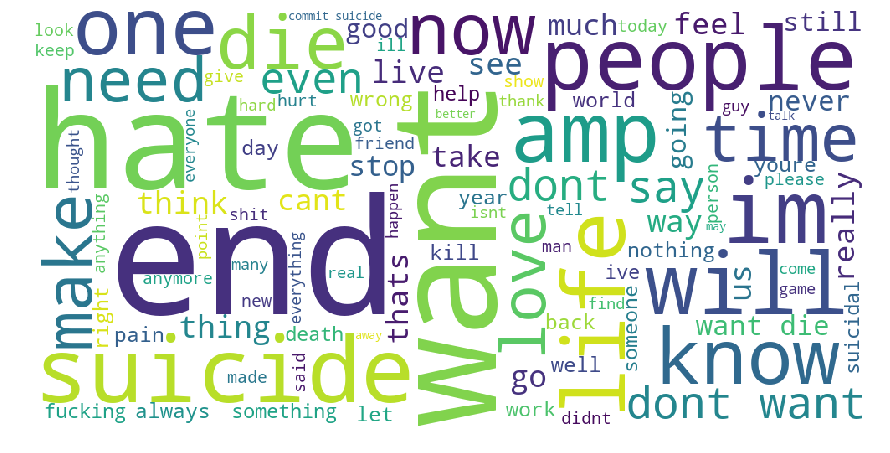

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
unique_string=(" ").join(tweet_df['clean_tweet'])
wordcloud = WordCloud(width = 1000, height = 500,max_words=100,background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_suicide1"+".png", bbox_inches='tight')
plt.show()
plt.close() 

You hate what
